<a href="https://colab.research.google.com/github/CAMI2-bit/SIMULACION-I/blob/main/Monte_Carlo_de_Acierto_y_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

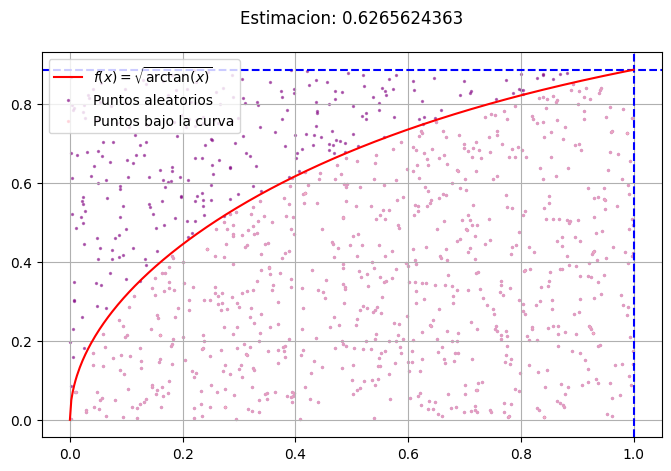

Estimación con Monte Carlo: 0.6265624363
Integral exacta: 0.6298233442
Error: 0.0032609079


In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return np.sqrt(np.arctan(x))

a, b = 0, 1

#Estimación con Monte Carlo
def dardos(n):
    dentro = 0
    for _ in range(n):
        x_rand = random.uniform(a, b)
        y_rand = random.uniform(0, f(1))
        if y_rand <= f(x_rand):
            dentro += 1
    return dentro


#Puntos para graficar la función
x = np.linspace(a, b, 400)
y = f(x)
N = 1000   #Número de dardos a lanzar


def experimento(m):
    lista = []
    for i in range(m):
        d = dardos(N)
    return lista

dentro = dardos(N)
integral_aprox = (b - a) * f(1) * (dentro / N)

integral_exacta, _ = quad(f, a, b )
error = abs(integral_aprox - integral_exacta)

#grafica
plt.figure(figsize=(8, 5))
plt.axhline(f(1), color="blue", linestyle="--")
plt.axvline(1, color="blue", linestyle="--")
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='red')

#Generar puntos aleatorios
x_rand = np.random.uniform(a, b, N)
y_rand = np.random.uniform(0, f(1), N)
plt.scatter(x_rand, y_rand, color="purple", s=2, alpha=0.5, label="Puntos aleatorios") #alpha:porcentaje de puntos (0-1)
plt.scatter(x_rand[y_rand <= f(x_rand)], y_rand[y_rand <= f(x_rand)], color="pink", s=2, alpha=0.5, label="Puntos bajo la curva")
plt.legend()
plt.title(f"Estimacion: {integral_aprox:.10f}\n")
plt.grid()
plt.show()


print(f"Estimación con Monte Carlo: {integral_aprox:.10f}")
print(f"Integral exacta: {integral_exacta:.10f}")
print(f"Error: {error:.10f}")